# N-dimensional X-OR Dataset

This synthetic dataset is based on the n-dimensional XOR problem. Each sample in the dataset has an identifier, a set of n features (x1, x2, ..., xn), and a target class label.

The features are continuous values drawn from a uniform distribution between 0 and 1. Each feature value is independent of the others. They are generated such that they are evenly distributed over the interval [0, 1].

The class label for each sample is determined by the number of features in that sample which have values less than 0.5. If the number of features less than 0.5 is odd, the sample is labeled as Class 1. If the number of features less than 0.5 is even, the sample is labeled as Class 0. This creates an n-dimensional XOR classification problem.

The identifiers for the samples are randomly generated alphanumeric strings. They are used to uniquely identify each sample in the dataset.

In summary, this dataset presents an n-dimensional XOR problem, where the task is to classify samples based on whether the number of their features less than 0.5 is odd or even. The relationship between features and target would be unknown to us. This makes it a challenging task for binary classification algorithms, especially when the number of dimensions is high.

In [1]:
import numpy as np
import pandas as pd
import os
import pprint
import json
import os, sys
import random
import string
from math import cos, sin
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_name = "xor"

In [3]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_test_key_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
outp_infer_instances = os.path.join(output_dir, f'{dataset_name}_infer_req.json')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Generation functions

In [4]:
def set_seed(seed_value=0):
    np.random.seed(seed_value)
    random.seed(seed_value)

In [5]:
def generate_id(size=6, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

In [6]:
def generate_dataset_nd(num_samples, num_dimensions):
    # Generate random feature values
    features = np.random.rand(num_samples, num_dimensions)

    # Apply the classification rules
    less_than_half = np.sum(features < 0.5, axis=1)
    classes = less_than_half % 2  # 0 if even, 1 if odd

    # Create a DataFrame
    feature_names = [f'x{i+1}' for i in range(num_dimensions)]
    df = pd.DataFrame(features, columns=feature_names)
    df.insert(0, "id",  [generate_id() for _ in range(num_samples)])
    df.insert(1, "target",  classes)

    return df

# Visualize for 2d case for Verification

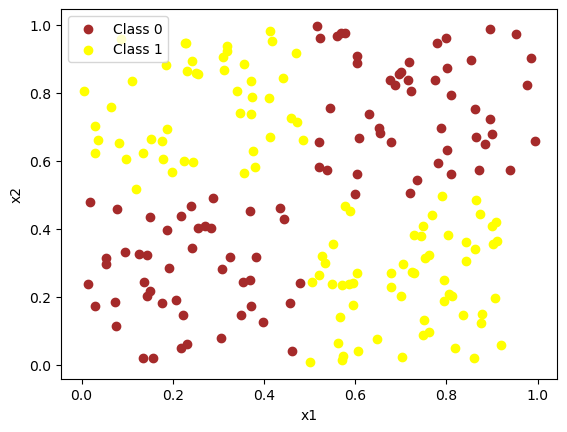

In [7]:
# Verify it works for 2d case

def plot_2d(df):
#     Plot class 0
    class_0 = df[df['target'] == 0]
    plt.scatter(class_0['x1'], class_0['x2'], color='brown', label='Class 0')

    # Plot class 1
    class_1 = df[df['target'] == 1]
    plt.scatter(class_1['x1'], class_1['x2'], color='yellow', label='Class 1')


    # Set plot labels and legend
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

    plt.show()

# Generate a 2D XOR dataset
df_2d = generate_dataset_nd(200, 2)

# Plot the dataset
plot_2d(df_2d)


# Create 5d XOR Data

In [8]:
set_seed(seed_value=314159)
data = generate_dataset_nd(600, 5)
data.head()

,id,target,x1,x2,x3,x4,x5
0,MRSGHT,0,0.817923,0.551046,0.419775,0.098692,0.811021
1,T6LKCN,1,0.967356,0.098207,0.801860,0.604902,0.584769
2,66JLUA,0,0.493088,0.476750,0.263968,0.309604,0.907954
3,6IQVT4,1,0.184985,0.188239,0.088390,0.874215,0.642408
4,V9VNFH,0,0.852825,0.533060,0.879402,0.293400,0.427836


# Save Main Data File

In [9]:
data.to_csv(outp_fname, index=False, float_format="%.4f")